In [2]:
import numpy as np
import pandas as pd
from tempfile import TemporaryFile
from PIL import Image
import glob
import matplotlib.pyplot as plt 
# ---------------------------
# ------ MODELING -----------
from keras.preprocessing.image import array_to_img, \
    img_to_array, load_img
    
    
    
%matplotlib inline

In [3]:
def get_file_list(location = '../images/*.*'):
    return sorted(glob.glob(location))
# files in /images folder
filelist_images = get_file_list()

# save filelist_images to done.csv

done_files = np.array(filelist_images)
np.savetxt('../images/done/done.csv', 
           done_files, 
           delimiter=",",
           fmt='%s')

# open done.csv file and save as done list
completed = pd.read_csv('../images/done/done.csv', header = None)
is_done = np.array(completed)
done = []
length = len(is_done)
for i in range(length):
    done.append(is_done[i][0])
filelist_images == done

True

In [5]:
def check_for_new():
    '''
    function to look at /images folder and see
    if new files have been added
    '''
    if filelist_images == done:
        return 'no action needed'
    else:
        print('need to update database')
        pass

def convert_to_gs(array):
    # define RGB conversion
    red = .299
    green = .587
    blue = round(1-(red+green), 3)
    gs = np.array([red, green, blue]).T
    return array.dot(gs)

In [6]:
# create a dictionary that has the following info:
# dictionary is created during loop through all files
# after file is converted to npy
# file: example  red_oak_v07 - unique name
# height: example array = np.array(img); array.shape[0]
# width: example array = np.array(img); array.shape[1]
''' test of concept'''
i = 3
image = Image.open(filelist_images[i])
array = np.array(image)
print('Image Array Size: ', array.shape)

# ------------ FIXED FOR ALL FILES -------------
size = 180 # size of image
border = 5 # remove any weirdness at egde

# Create loop through each file
total_rows = 0
file_indexing = [[]]
images_dict = {}
for file in filelist_images:
    image = Image.open(file)
    array = np.array(image)
    array = convert_to_gs(array)
    # array in now grey scale
    height = array.shape[0]
    width = array.shape[1]
    steps_h = int((height-2*border)/(size/2))
    steps_w = int((width-2*border)/(size/2))
    num_slices = (steps_w-1) * (steps_h-1)
    num_rows = num_slices * 8
    file.split('ges/')[1]
    stuff = [file.split('ges/')[1], file, num_rows, file.split('ges/')[1].split('_v')[0]]
    file_indexing.append(stuff)
    total_rows += num_rows
   
if [] in file_indexing:
    file_indexing.remove([])
    
print('total number of rows: ', total_rows)
print('2nd row of file indexing \n', file_indexing[1])

X = np.zeros((total_rows, size, size))
y = np.zeros((total_rows, 1))
print('X shape: ', X.shape)
print('y shape: ', y.shape)

Image Array Size:  (240, 1705, 3)
total number of rows:  98128
2nd row of file indexing 
 ['beech_v02.jpg', '../images/beech_v02.jpg', 560, 'beech']
X shape:  (98128, 180, 180)
y shape:  (98128, 1)


In [7]:
# get number of catagories and 
# list of woods being looked at
names = []
for row in range(len(file_indexing)):
    names.append(file_indexing[row][3])
unique_names = set(names)
unique_names = list(unique_names)
wood_names_map = {}

for i in range(len(unique_names)):
    print(unique_names[i])
    wood_names_map[unique_names[i]] = i

# print(wood_names_map)
wood_index_map = {v: k for k, v in wood_names_map.items()}
# print(wood_index_map)
# for line in file_indexing:
#     print(file_indexing[i])


white_oak
walnut
red_oak
beech
maple
cherry


file name:  ../images/cherry_v05.jpg
wood name:  cherry_v05.jpg
Image Array Size:  (318, 504, 3)
current grey scale shape: (318, 504)


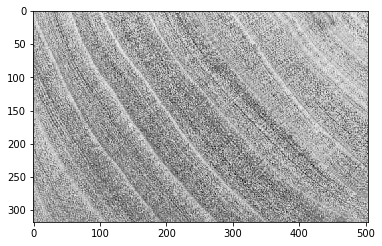

In [8]:
# check new array for size, and look
i = 6

print('file name: ', filelist_images[i])
print('wood name: ', filelist_images[i].split('ges/')[1])


image = Image.open(filelist_images[i])
array = np.array(image)
grey_array = convert_to_gs(array)
print('Image Array Size: ', array.shape)

print('current grey scale shape:', grey_array.shape) 

# -----------------------------------------------------
# print current array picture
plt_grey_full = plt.imshow(grey_array , cmap = plt.cm.Greys_r)
plt.show(plt_grey_full)

In [9]:
wood_index_map

{0: 'white_oak',
 1: 'walnut',
 2: 'red_oak',
 3: 'beech',
 4: 'maple',
 5: 'cherry'}

In [10]:
# walk through file indexing files, and add files to X and y
at_row = 0
for i in range(len(file_indexing)):
    file_name = file_indexing[i][0]
    file = file_indexing[i][1]
    file_num_rows = file_indexing[i][2]
    wood_name = file_indexing[i][3]
    wood_number = int(wood_names_map[file_indexing[i][3]])
    
    
    # print('file number ', i)
    #print('file name: ', file_name)
    #print('path: ', file)
    #print('num rows: ', file_num_rows)
    #print('wood name: ', wood_name)
    #print('wood number: ', wood_number)
    #print('\n')
    
    image = Image.open(file)
    array = np.array(image)
    array = convert_to_gs(array)
    
    # array in now grey scale
    height = array.shape[0]
    width = array.shape[1]
    steps_h = int((height-2*border)/(size/2))
    steps_w = int((width-2*border)/(size/2))
    
    for w in range(steps_w):
        for h in range(steps_h):
            begin_w = int(w*(size/2)) + border
            end_w = begin_w + size
            begin_h = int(h*(size/2)) + border
            end_h = begin_h + size
            if end_w <= width and end_h <= height and at_row < X.shape[0]:
                area = (begin_w, begin_h, end_w, end_h)
                X[at_row] = array[begin_h:end_h, begin_w:end_w]
                # print('row: ', at_row, 'wood: ', wood_name, 'index: ', wood_number)
                # print(X[at_row])
                # print('\n')
                cropped_imgA = X[at_row]
                y[at_row] = wood_number
                
                X[at_row + 1] = np.rot90(cropped_imgA)
                cropped_imgB = np.rot90(cropped_imgA)
                y[at_row + 1] = wood_number
                
                X[at_row + 2] = np.rot90(cropped_imgB)
                cropped_imgC = np.rot90(cropped_imgB)
                y[at_row + 2] = wood_number
                
                X[at_row + 3] = np.rot90(cropped_imgC)
                cropped_imgD = np.rot90(cropped_imgC)
                y[at_row + 3] = wood_number
                
                X[at_row + 4] = np.fliplr(cropped_imgA)
                y[at_row + 4] = wood_number
                X[at_row + 5] = np.fliplr(cropped_imgB)
                y[at_row + 5] = wood_number
                X[at_row + 6] = np.fliplr(cropped_imgC)
                y[at_row + 6] = wood_number
                X[at_row + 7] = np.fliplr(cropped_imgD)
                y[at_row + 7] = wood_number
                at_row = at_row + 8
        

print("I'm done done done")
print('\n')


I'm done done done




In [11]:
X.shape

(98128, 180, 180)

In [12]:
total_rows

98128

In [13]:
X[100]

array([[ 176.229,  173.784,  170.784, ...,  164.638,  163.638,  163.638],
       [ 175.343,  175.055,  172.941, ...,  169.735,  167.094,  164.094],
       [ 174.201,  175.201,  175.212, ...,  175.995,  171.767,  167.653],
       ..., 
       [ 163.094,  160.556,  162.154, ...,  159.215,  156.916,  154.916],
       [ 161.023,  158.795,  159.795, ...,  160.916,  156.916,  152.916],
       [ 161.653,  161.023,  160.023, ...,  159.144,  158.144,  156.133]])

In [14]:
y[3000]

array([ 5.])

In [15]:
np.save('../data/X', X)
np.save('../data/y', y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gauss_fit = gnb.fit(X_train, y_train)
# gauss_pred = gnb.predict(X_test)
# print_stuff(gauss_fit, gauss_pred)

In [ ]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
tts = train_test_split
X_train, X_test, y_train, y_test = tts(
    X, y, test_size = .2)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix
cr = classification_report

In [ ]:
def print_stuff(fit, pred):
    
    print('classification report\n')
    print(cr(y_test, pred))
    print('confusion matrix\n')
    print(cm(y_test, pred))
    print('\n')
    print('Score:', fit.score(X_test, y_test))

In [ ]:
# Check to see what they look like
print("X_train, and y_train", X_train.shape, y_train.shape)
print("X_test, and y_test", X_test.shape, y_test.shape)

In [ ]:
len(unique_names)

In [ ]:
nb_classes = len(unique_names)
# convert class vectors to binary class matrices (don't change)
Y_train = np_utils.to_categorical(y_train, nb_classes) # cool
Y_test = np_utils.to_categorical(y_test, nb_classes)   # cool * 2

In [ ]:
# They should look different now
print("X_train, and Y_train", X_train.shape, Y_train.shape)
print("X_test, and Y_test", X_test.shape, Y_test.shape)

In [ ]:
print(unique_names)
Y_train[:6]
print(size)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D

from keras import backend as K

In [ ]:
batch_size = 50 # number of training samples used at a time to update the weights
nb_epoch = 2    # number of passes

In [ ]:
# input image dimensions
img_rows, img_cols = size, size 

In [ ]:
input_shape = (img_rows, img_cols, 1)

In [ ]:
# number of convolutional filters to use
nb_filters = 8

In [ ]:
# size of pooling area for max pooling
pool_size = (2, 2) # decreases image size, and helps to avoid overfitting



In [ ]:
# convolution kernel size
kernel_size = (4, 4) # slides over image to learn features

In [ ]:
# reshape image for Keras, note that image_dim_ordering set in ~.keras/keras.json
# don't change any of this
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# don't change conversion or normalization
X_train = X_train.astype('float32') # data was uint8 [0-255]
X_test = X_test.astype('float32')  # data was uint8 [0-255]
X_train /= 255 # normalizing (scaling from 0 to 1)
X_test /= 255  # normalizing (scaling from 0 to 1)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
model = Sequential() # model is a linear stack of layers (don't change)

In [ ]:
model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),
                    padding='valid',
                    input_shape=input_shape)) #first conv. layer (keep layer)
model.add(Activation('tanh')) # Activation specification necessary for Conv2D and Dense layers

model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]))) #2nd conv. layer (keep layer)
model.add(Activation('tanh'))

model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
model.add(Dropout(0.5)) # zeros out some fraction of inputs, helps prevent overfitting

model.add(Flatten()) # necessary to flatten before going into conventional dense layer (keep layer)
print('Model flattened out to ', model.output_shape)

# now start a typical neural network
model.add(Dense(32)) # (only) 32 neurons in this layer, really?  (keep layer)
model.add(Activation('tanh'))

model.add(Dropout(0.5)) # zeros out some fraction of inputs, helps prevent overfitting

model.add(Dense(nb_classes)) # 10 final nodes (one for each class) (keep layer)
model.add(Activation('softmax')) # keep softmax at end to pick between classes 0-9

# many optimizers available
# see https://keras.io/optimizers/#usage-of-optimizers
# suggest you keep loss at 'categorical_crossentropy' for this multiclass problem,
# and metrics at 'accuracy'
# suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
# how are we going to solve and evaluate it:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])



In [ ]:
# during fit process watch train and test error simultaneously
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

In [ ]:
# load images from test folder
i = 6
# get list of files from input
def get_input(location = '../inputs/*.*'):
    return glob.glob(location)
# files in /images folder
# images need to standarized to 150 x 150
inputs = get_input()
image = Image.open(inputs[i])
image

In [ ]:
test_array = np.array(image)
# convert to grey scale
test_array_gs = convert_to_gs(test_array)
# get middle 150 x 150 slice
start_mid_height = int(test_array_gs.shape[0]/2) - 75
start_mid_length = int(test_array_gs.shape[1]/2) - 75
sliced_array = test_array_gs[start_mid_height:start_mid_height+150, start_mid_length: start_mid_length + 150]
sliced_array.shape
print('file name: ', inputs[i])
print('Image Array Size: ', sliced_array.shape)
# print current array picture
plt_grey_test = plt.imshow(sliced_array , cmap = plt.cm.Greys_r)
plt.show(plt_grey_test)

In [ ]:
def get_image(file):
    image = Image.open(file)
    array = np.array(image)
    # verify big enough and correct size
    h, w, c = array.shape
    if h < 150 or w < 150 or c != 3:
        return "Wrong File Format or Size"
    ags = convert_to_gs(array)
    v_start, v_end = int(ags.shape[0]/2) - 75, int(ags.shape[0]/2) + 75
    h_start, h_end = int(ags.shape[1]/2) - 75, int(ags.shape[1]/2) + 75
    sa = ags[v_start:v_end, h_start:h_end]
    return sa

In [ ]:
i = 12
# print full image to test
image = Image.open(inputs[i])
img_array_test = np.array(image)
plt_full_test = plt.imshow(img_array_test)
plt.show(plt_full_test)
to_test = get_image(inputs[i])
print('file name: ', inputs[i])
print('Image Array Size: ', to_test.shape)
# print current array picture
plt_grey_test = plt.imshow(to_test , cmap = plt.cm.Greys_r)
plt.show(plt_grey_test)


In [ ]:

if K.image_dim_ordering() == 'th':
    to_test = to_test.reshape(1, 1, 150, 150)
    

else:
    to_test = to_test.reshape(1, 150, 150, 1)

In [ ]:
predicts = np.around(100 * model.predict(to_test),0)

In [ ]:
predicts

In [ ]:
wood_index_map

In [ ]:
predicts.max()

In [ ]:
Y_train.shape

In [ ]:
Y_train[200:300]

In [ ]:
Y_test.sum(axis = 0)